## TZ Survey Analysis

In [ ]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import modin.pandas as pd

In [ ]:
# The first step is to fetch all the data
# determine the relative path of the folder holding the csv files
folder_path = "./TZA_2020_NPS-R5_v02_M_CSV"

In [ ]:
# Initialize an empty dictionary to store the data (household and consumption data specifically)
data_dict = {}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("hh_") or filename.startswith("consumption_"):
        # Create the variable name (removing the .csv extension)
        var_name = os.path.splitext(filename)[0]
        
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        data_dict[var_name] = pd.read_csv(file_path)

In [ ]:
# List of all datasets:
data_dict.keys()

From the review of the data, it seems like the important datasets are:
1. hh_sec_a {y5_hhid}
2. hh_sec_b {y5_hhid, indidy5}
3. hh_sec_e2 (occupation data) {y5_hhid, indidy5}
3. hh_sec_e3 (firewood collection shows source of energy) {y5_hhid, indidy5}
4. hh_seg_g (financial status) {y5_hhid, indidy5}
5. hh_sec_j1 (food consumed) {y5_hhid, itemcode
6. hh_sec_m (household assets) {y5_hhid, itemcode}

# Columns of interest

In [ ]:
a_hh_basic = data_dict['hh_sec_a'][['y5_hhid','y5_rural','hh_a02_1',]].rename(columns = {'hh_a02_1':'location'})
a_hh_basic

In [ ]:
# getting region and district info from the location column "hh_a02_1"
a_hh_basic['location'] = a_hh_basic['location'].astype(str)

# extract all but the last xter
a_hh_basic['region'] = a_hh_basic['location'].str[:-1]
# extract the last xter
a_hh_basic['district'] = a_hh_basic['location'].str[-1]

# convert region/district back into integers
a_hh_basic['region'] = a_hh_basic['region'].astype(int)
a_hh_basic['district'] = a_hh_basic['district'].astype(int)
a_hh_basic = a_hh_basic.drop(columns = ['location'])

In [116]:
# [OBS] region data does not align perfectly with "MAGERESHO YA MIKOA NA WILAYA" section
# of the questionairre
a_hh_basic.groupby(['region', 'district']).size().reset_index(name='count')

,region,district,count
0,1,1,13
1,1,2,13
2,1,3,10
3,1,4,8
4,1,5,168
...,...,...,...
182,53,2,51
183,54,1,41
184,54,2,52
185,55,1,49


In [117]:
a_hh_basic

,y5_hhid,y5_rural,region,district
0,1000-001-01,1,2,2
1,1000-001-02,1,2,2
2,1000-001-03,1,2,2
3,1000-001-06,1,2,2
4,1001-001-01,1,2,2
...,...,...,...,...
4704,9807-001-99,2,19,3
4705,9808-001-99,2,19,3
4706,9809-001-99,2,19,3
4707,9810-001-99,2,19,3


In [118]:

data_dict['hh_sec_c']

,interview__key,y5_hhid,indidy5,hh_c01,hh_c01_1,hh_c01_2,hh_c02,hh_c03,hh_c03_1,hh_c04,...,hh_c28_2,hh_c28_3,hh_c28_4,hh_c28_5,hh_c28_6,hh_c28_7,hh_c28_8,hh_c29,hh_c30,hh_c01_3
0,39-26-37-98,1000-001-01,1,1.0,1.0,NaN,1.0,1.0,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
1,39-26-37-98,1000-001-01,3,1.0,1.0,NaN,1.0,1.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
2,39-26-37-98,1000-001-01,5,1.0,2.0,3.0,1.0,1.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
3,39-26-37-98,1000-001-01,7,1.0,2.0,3.0,1.0,1.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,NaN,NaN
4,04-06-65-04,1000-001-02,1,1.0,1.0,NaN,1.0,1.0,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,53-69-11-30,9811-001-99,1,1.0,1.0,NaN,1.0,1.0,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
23588,53-69-11-30,9811-001-99,2,1.0,1.0,NaN,3.0,1.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
23589,53-69-11-30,9811-001-99,3,1.0,2.0,2.0,1.0,1.0,NaN,7.0,...,50000.0,43000.0,0.0,60000.0,10000.0,24000.0,NaN,NaN,NaN,NaN
23590,53-69-11-30,9811-001-99,4,1.0,2.0,2.0,5.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
data_dict.keys()

dict_keys(['hh_sec_q1', 'hh_sec_q2', 'hh_sec_e3', 'hh_sec_e2', 'hh_sec_e1', 'hh_sec_i2', 'hh_sec_a', 'hh_sec_v', 'hh_sec_c', 'hh_sec_b', 'hh_sec_ja1', 'hh_sec_f', 'hh_sec_p', 'hh_sec_g', 'hh_sec_o2', 'hh_sec_r', 'hh_sec_s', 'hh_sec_d', 'hh_sec_o1', 'hh_sec_u2', 'hh_sec_i', 'hh_sec_h', 'hh_sec_k', 'consumption_real_y5', 'consumption_real_y4', 'hh_sec_n', 'hh_sec_l', 'hh_sec_m', 'hh_sec_j3', 'hh_sec_j1', 'hh_sec_j4'])

In [120]:
# Consumption data: Construction from nps_wave_5_report.pdf, appendix A.
# consumption is for 28 days
# data dictionaty: https://microdata.worldbank.org/index.php/catalog/5639/data-dictionary/F65?file_name=consumption_real_y5

data_dict['consumption_real_y5']#.columns

# 2021 Exchange rate (USD): 0.0004
# https://www.exchangerates.org.uk/TZS-USD-spot-exchange-rates-history-2021.html

,y5_hhid,booster,cluster,strata,hhweight2,urban,area,region,district,month,...,nf_clothingR_pae,nf_utilitiesR_pae,nf_hhexpensesR_pae,nf_transportR_pae,nf_communicR_pae,nf_recreatR_pae,nf_otherR_pae,dur_expR_pae,rent_expR_pae,expmR_pae
0,1230-001-01,0,70116204544,1,783.868164,2,1,7,71,1,...,0.000000,189222.421875,0.000000,1199.313232,3459.557373,0.0,4804.940918,7020.397949,21496.183594,400203.750000
1,1210-001-01,0,70114197504,1,7803.531738,2,1,7,71,2,...,8342.855469,8920.335938,0.000000,0.000000,2395.078369,0.0,4071.633057,5589.160156,18357.865234,162522.250000
2,1249-001-01,0,70119202816,1,3071.586182,2,1,7,71,2,...,5631.837891,16171.419922,362.046722,37652.859375,7240.934082,0.0,6275.476562,2994.131104,16895.513672,193675.281250
3,1253-001-01,0,70119202816,1,2179.735840,2,1,7,72,2,...,8320.455078,9047.399414,262.751190,6831.531250,1313.755981,0.0,11736.220703,480.378845,7882.536133,109706.046875
4,1291-001-01,0,70123208704,1,1843.329712,2,1,7,71,3,...,5264.543945,16828.490234,1835.069580,6257.286621,4512.466309,0.0,5866.206055,10374.131836,29132.677734,211980.781250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,3300-001-01,0,530103304192,4,75.445923,2,4,53,531,11,...,6609.943848,20378.623047,4665.842773,13330.978516,1999.646851,0.0,1932.991943,12790.872070,7005.061523,156576.218750
4705,3572-001-03,0,530224218112,4,546.535278,2,4,53,531,12,...,2690.599365,15103.634766,0.000000,5030.514160,2176.664795,0.0,5260.272949,3312.602295,22306.177734,137469.125000
4706,2387-001-01,0,510116200448,4,141.791733,2,4,51,511,10,...,2229.154541,3753.085693,0.000000,0.000000,972.721985,0.0,1580.673218,1163.224487,8576.289062,95926.726562
4707,3321-001-06,0,530116313088,4,241.140274,2,4,53,531,12,...,4400.737793,33697.078125,2095.589355,5230.591309,4023.531738,0.0,2766.178223,5293.585938,40235.316406,274493.000000


In [ ]:
data_dict['hh_sec_i']

#### Energy Data

In [211]:
i_hh_energy = data_dict['hh_sec_i'][['y5_hhid','hh_i16','hh_i16_1','hh_i17','hh_i18']].rename(columns = {
    'hh_i16':'cooking_fuel',
    'hh_i16_1':'cooking_stove',
    'hh_i17':'lighting_fuel',
    'hh_i18':'electricity_source'
})

In [212]:
# Create dictionaries to help in renaming the values in the columns
# Fuel used for cooking
ckfuel_dict = { 1:'Firewood',
                2:'Paraffin',
                3:'Electricity',
                4:'Gas',
                5:'Charcoal',
                6:'Animal Residue',
                7:'Gas (Biogas)'}

# Assumptions made in assigning the codes to the stove types, since the questionnaire only has 2 codes while the data has 4 outcomes
stove_dict = {  1:'stone',
                2:'other self-built',
                3:'manufactured',
                4:'other'}

light_dict = {  1:'Electricity',
                2:'Solar',
                3:'Gas',
                4:'Gas (Biogas)',
                5:'Lamp oil',
                6:'Candle',
                7:'Firewood',
                8:'Private Generator',
                9:'Torch',
                10:'Other'}

elec_dict = {   1:'Tanesco',
                2:'Community Generator',
                3:'Solar Panels',
                4:'Own Generator',
                5:'Car Battery',
                6:'Motorcycle Battery',
                7:'Other'}

In [213]:
#df['string_column'] = df['code_column'].map(code_to_string)
i_hh_energy['cooking_fuel'] = i_hh_energy['cooking_fuel'].map(ckfuel_dict).fillna('Other')
i_hh_energy['cooking_stove'] = i_hh_energy['cooking_stove'].map(stove_dict).fillna('Other')
i_hh_energy['lighting_fuel'] = i_hh_energy['lighting_fuel'].map(light_dict).fillna('Other')
i_hh_energy['electricity_source'] = i_hh_energy['electricity_source'].map(elec_dict).fillna('no-electricity')
i_hh_energy

,y5_hhid,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
0,1000-001-01,Firewood,stone,Solar,Solar Panels
1,1000-001-02,Charcoal,manufactured,Candle,no-electricity
2,1000-001-03,Firewood,stone,Solar,Solar Panels
3,1000-001-06,Firewood,stone,Electricity,Tanesco
4,1001-001-01,Firewood,stone,Solar,Community Generator
...,...,...,...,...,...
4704,9807-001-99,Electricity,Other,Electricity,Tanesco
4705,9808-001-99,Electricity,Other,Electricity,Tanesco
4706,9809-001-99,Firewood,stone,Lamp oil,no-electricity
4707,9810-001-99,Charcoal,manufactured,Solar,Solar Panels


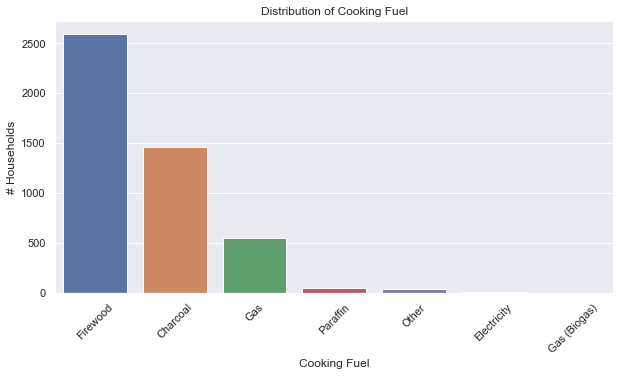

In [214]:
# Households using certain fuel types
cooking_fuel_counts = i_hh_energy['cooking_fuel'].value_counts()
lighting_fuel_counts = i_hh_energy['lighting_fuel'].value_counts()
electricity_source_counts = i_hh_energy['electricity_source'].value_counts()

# Plot the distribution of cooking fuel
plt.figure(figsize=(10, 5))
sns.barplot(x=cooking_fuel_counts.index, y=cooking_fuel_counts.values)
plt.title('Distribution of Cooking Fuel')
plt.xticks(rotation=45)
plt.xlabel('Cooking Fuel')
plt.ylabel('# Households')
plt.show()

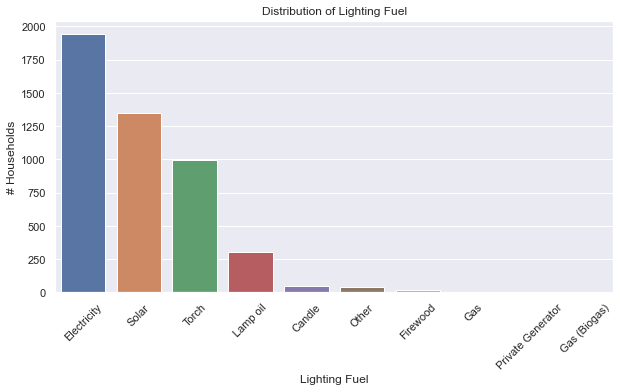

In [215]:
# Plot the distribution of Lighting fuel
plt.figure(figsize=(10, 5))
sns.barplot(x=lighting_fuel_counts.index, y=lighting_fuel_counts.values)
plt.title('Distribution of Lighting Fuel')
plt.xticks(rotation=45)
plt.xlabel('Lighting Fuel')
plt.ylabel('# Households')
plt.show()

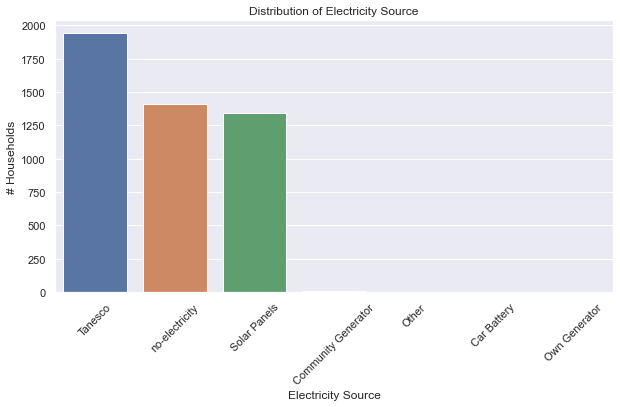

In [216]:
# Plot the distribution of cooking fuel
plt.figure(figsize=(10, 5))
sns.barplot(x=electricity_source_counts.index, y=electricity_source_counts.values)
plt.title('Distribution of Electricity Source')
plt.xticks(rotation=45)
plt.xlabel('Electricity Source')
plt.ylabel('# Households')
plt.show()

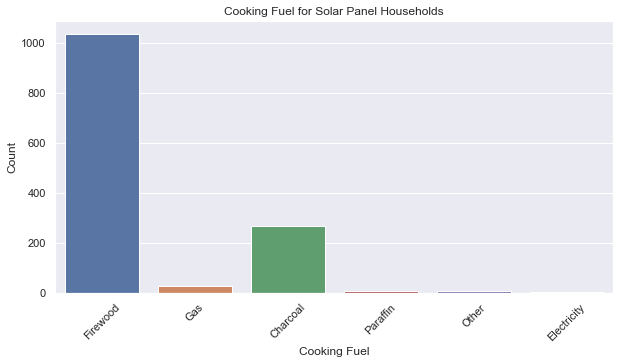

In [218]:
sns.set()
plt.figure(figsize=(10, 5))
sns.countplot(data=i_hh_energy[i_hh_energy['electricity_source'] == 'Solar Panels'], x='cooking_fuel')
plt.title('Cooking Fuel for Solar Panel Households')
plt.xlabel('Cooking Fuel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

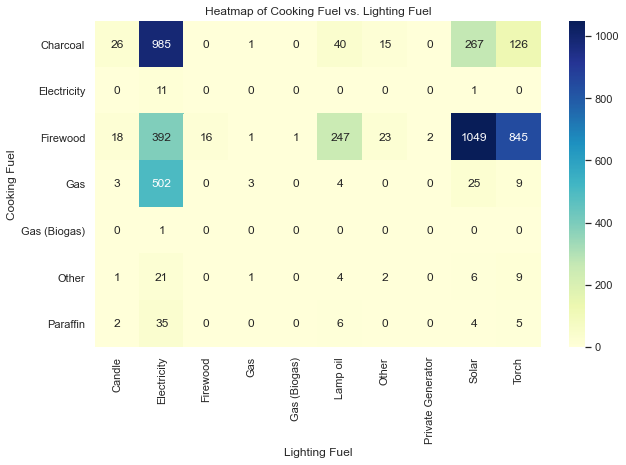

In [219]:
crosstab = pd.crosstab(i_hh_energy['cooking_fuel'], i_hh_energy['lighting_fuel'])

# Create a heatmap to visualize relationships
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt = 'd', cmap='YlGnBu')
plt.title('Heatmap of Cooking Fuel vs. Lighting Fuel')
plt.xlabel('Lighting Fuel')
plt.ylabel('Cooking Fuel')
plt.show()

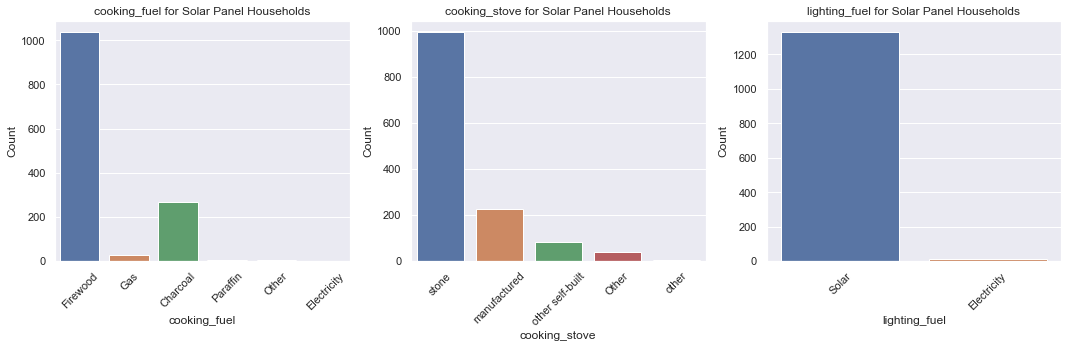

In [220]:
fig, axes = plt.subplots(1, len(columns_of_interest), figsize=(15, 5))

for i, col in enumerate(columns_of_interest):
    sns.countplot(data=i_hh_energy[i_hh_energy['electricity_source'] == 'Solar Panels'], x=col, ax=axes[i])
    axes[i].set_title(f'{col} for Solar Panel Households')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [221]:
i_hh_energy['lighting_fuel'].value_counts()

lighting_fuel
Electricity          1947
Solar                1352
Torch                 994
Lamp oil              301
Candle                 50
Other                  40
Firewood               16
Gas                     6
Private Generator       2
Gas (Biogas)            1
Name: count, dtype: int64

In [222]:
filtered_df = i_hh_energy[~((i_hh_energy['lighting_fuel'] == 'Electricity') | (i_hh_energy['lighting_fuel'] == 'Solar'))]
filtered_df

,y5_hhid,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
1,1000-001-02,Charcoal,manufactured,Candle,no-electricity
6,1003-001-01,Firewood,stone,Torch,no-electricity
7,1005-001-01,Firewood,stone,Lamp oil,no-electricity
11,1006-001-05,Gas,Other,Torch,no-electricity
12,1007-001-01,Firewood,manufactured,Lamp oil,no-electricity
...,...,...,...,...,...
4675,9762-001-99,Charcoal,manufactured,Torch,no-electricity
4677,9768-001-99,Charcoal,other self-built,Lamp oil,no-electricity
4691,9786-001-99,Charcoal,manufactured,Candle,no-electricity
4694,9793-001-99,Firewood,stone,Torch,no-electricity


In [223]:
combination_counts = i_hh_energy.groupby(['electricity_source', 'lighting_fuel']).size().reset_index(name='count')
# print(combination_counts)

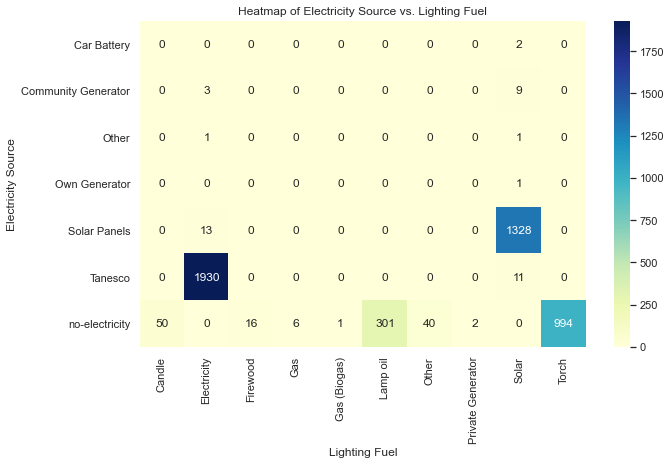

In [224]:
crosstab = pd.crosstab(i_hh_energy['electricity_source'],
                       i_hh_energy['lighting_fuel'])

# Create a heatmap to visualize relationships
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt = 'd', cmap='YlGnBu')
plt.title('Heatmap of Electricity Source vs. Lighting Fuel')
plt.xlabel('Lighting Fuel')
plt.ylabel('Electricity Source')
plt.show()

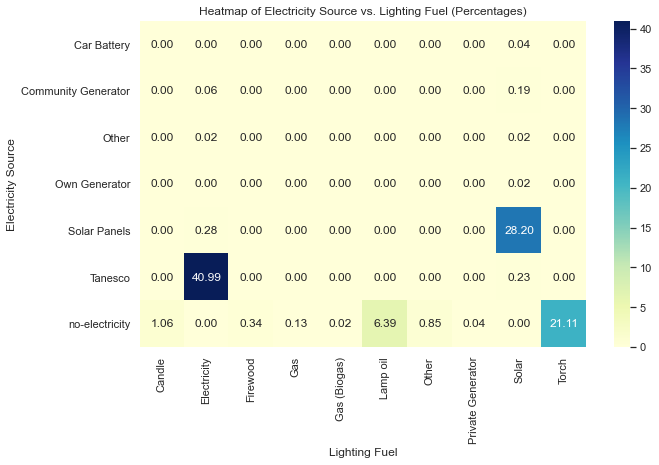

In [225]:
# Create the cross-tabulation table
crosstab = pd.crosstab(i_hh_energy['electricity_source'], i_hh_energy['lighting_fuel'])

# Calculate the total count of all observations
total_count = crosstab.values.sum()

# Calculate the percentages by dividing each cell by the total count
percentage_crosstab = (crosstab / total_count) * 100

# Create a heatmap to visualize relationships using percentages
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_crosstab, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Electricity Source vs. Lighting Fuel (Percentages)')
plt.xlabel('Lighting Fuel')
plt.ylabel('Electricity Source')
plt.show()

In [226]:
cons_data = data_dict['consumption_real_y5']
cons_data = cons_data[['y5_hhid','urban','region','district','hhsize','nf_clothing', 'nf_utilities', 'nf_hhexpenses', 'nf_transport', 'nf_communic', 'nf_recreat', 'nf_other', 'dur_exp', 'rent_exp', 'foodIN', 'foodOUT', 'educa', 'health']]

In [227]:
cons_data.merge(i_hh_energy, how = 'left', on = 'y5_hhid')

,y5_hhid,urban,region,district,hhsize,nf_clothing,nf_utilities,nf_hhexpenses,nf_transport,nf_communic,...,dur_exp,rent_exp,foodIN,foodOUT,educa,health,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
0,1230-001-01,2,7,71,4,0,9845200,0,62400,180000,...,3.652697e+05,1.118442e+06,0.0,8221200,0,780000,Charcoal,manufactured,Electricity,Tanesco
1,1210-001-01,2,7,71,6,627000,670400,0,0,180000,...,4.200484e+05,1.379669e+06,7516600.0,234000,880500,0,Gas,Other,Electricity,Tanesco
2,1249-001-01,2,7,71,4,280000,804000,18000,1872000,360000,...,1.488602e+05,8.400000e+05,394160.0,4030000,570000,0,Gas,Other,Electricity,Tanesco
3,1253-001-01,2,7,72,4,380000,413200,12000,312000,60000,...,2.193918e+04,3.600000e+05,2241200.0,338000,180000,156000,Charcoal,manufactured,Electricity,Tanesco
4,1291-001-01,2,7,71,5,350000,1118800,122000,416000,300000,...,6.896981e+05,1.936813e+06,3107000.0,3541200,2024000,97500,Gas,Other,Electricity,Tanesco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,3300-001-01,2,53,531,7,595000,1834400,420000,1200000,180000,...,1.151382e+06,6.305669e+05,3809000.0,0,4100000,0,Gas,Other,Electricity,Tanesco
4705,3572-001-03,2,53,531,3,89000,499600,0,166400,72000,...,1.095747e+05,7.378467e+05,2178800.0,0,0,520000,Charcoal,manufactured,Electricity,Tanesco
4706,2387-001-01,2,51,511,4,110000,185200,0,0,48000,...,5.740055e+04,4.232061e+05,3244800.0,182000,405000,0,Charcoal,other self-built,Solar,Solar Panels
4707,3321-001-06,2,53,531,2,105000,804000,50000,124800,96000,...,1.263030e+05,9.600000e+05,483600.0,3733600,0,0,Gas,Other,Electricity,Tanesco


In [233]:
data_dict['hh_sec_e1']#['hh_e35b'].value_counts()

,interview__key,y5_hhid,indidy5,hh_e01_1,hh_e01,hh_e02,hh_e03,hh_e04,hh_e05,hh_e06,...,hh_e52,hh_e53a,hh_e53b,hh_e54,hh_e55,hh_e56,hh_e57,hh_e58,hh_e59,int_result
0,39-26-37-98,1000-001-01,1,1,1.0,NaN,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
1,39-26-37-98,1000-001-01,3,1,1.0,NaN,1.0,24.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
2,39-26-37-98,1000-001-01,5,1,2.0,3.0,1.0,70.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
3,39-26-37-98,1000-001-01,7,1,2.0,3.0,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
4,04-06-65-04,1000-001-02,1,1,1.0,NaN,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,53-69-11-30,9811-001-99,1,1,1.0,NaN,2.0,NaN,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1
23588,53-69-11-30,9811-001-99,2,1,1.0,NaN,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
23589,53-69-11-30,9811-001-99,3,1,2.0,2.0,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
23590,53-69-11-30,9811-001-99,4,1,2.0,2.0,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1


In [227]:
time_unit_wages = { 1:'Hour',
                    2:'Day',
                    3:'Week',
                    4:'Fortnight',
                    5:'Month',
                    6:'Quarter',
                    7:'Half Year',
                    8:'Year'}

In [237]:
# individual-level data on earnings/labour
data_dict['hh_sec_e1'][['y5_hhid','indidy5','hh_e35a','hh_e35b','hh_e36','hh_e37a','hh_e37b','hh_e38','hh_e39','hh_e41','hh_e51a','hh_e51b','hh_e52','hh_e53a','hh_e53b','hh_e54' ]]

,y5_hhid,indidy5,hh_e35a,hh_e35b,hh_e36,hh_e37a,hh_e37b,hh_e38,hh_e39,hh_e41,hh_e51a,hh_e51b,hh_e52,hh_e53a,hh_e53b,hh_e54
0,1000-001-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000-001-01,3,9000.0,2.0,2.0,NaN,NaN,10.0,3.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1000-001-01,5,10000.0,2.0,1.0,4000.0,1.0,8.0,4.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1000-001-01,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000-001-02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,9811-001-99,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23588,9811-001-99,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23589,9811-001-99,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23590,9811-001-99,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
data_dict['hh_sec_k']

,interview__key,y5_hhid,itemcode,hh_k01,hh_k02
0,39-26-37-98,1000-001-01,101,2.0,NaN
1,39-26-37-98,1000-001-01,102,2.0,NaN
2,39-26-37-98,1000-001-01,103,1.0,1000.0
3,39-26-37-98,1000-001-01,201,2.0,NaN
4,39-26-37-98,1000-001-01,202,2.0,NaN
...,...,...,...,...,...
122429,53-69-11-30,9811-001-99,219,2.0,NaN
122430,53-69-11-30,9811-001-99,220,2.0,NaN
122431,53-69-11-30,9811-001-99,221,2.0,NaN
122432,53-69-11-30,9811-001-99,222,2.0,NaN


In [241]:
expenditure_items = {   201:'Kerosene',
                        202:'Electricity, including electricity vouchers',
                        203:'Gas (for lighting/cooking)',
                        205:'Petrol or diesel',
                        206:'Cell phone voucher',
                        207:'charcoal',
                        216:'Light bulbs',
                        414:'Lanterns',
                        419:'Electric/gas stove',
                        420:'Other stove',
                        421:'Water-heater'}

Pick up from Section N of the questionnaire after adding expenditure_items (items and amounts) from hh_sec_k and and income data (hh_sec_e1) to the dataframe cons_data